In [1]:
import numpy as np

import matplotlib.pyplot as plt

#%tensorflow_version 2.x

import tensorflow as tf

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Dense , Conv2D, Flatten, MaxPooling2D, BatchNormalization

from tensorflow.keras import utils

from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [3]:
from sklearn.model_selection import train_test_split
x=np.concatenate((x_train, x_test))
y=np.concatenate((y_train, y_test))
print("dataset shape",x.shape)
print("labels shape",y.shape)
train_size=0.6
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=train_size)
print("training data",x_train.shape)
print("training labels",y_train.shape)
print("testing data",x_test.shape)
print("testing labels",y_test.shape)

dataset shape (70000, 28, 28)
labels shape (70000,)
training data (42000, 28, 28)
training labels (42000,)
testing data (28000, 28, 28)
testing labels (28000,)


/home/gitanjali/anaconda3/envs/intel_python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


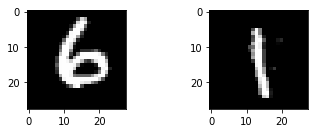

In [4]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))

In [5]:
x_train=np.expand_dims(x_train, axis=3)
x_test=np.expand_dims(x_test, axis=3)

input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3])
print("input_shape",input_shape)

# precise the pixel value to be 32 bit
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# normalize input from 0-255 to 0-1
x_train = x_train / 255.
x_test = x_test / 255.

print("normalize training data", x_train.shape)
print("normalize testing data", x_test.shape)
print("training labels", y_train.shape)
print("testing labels", y_test.shape)

input_shape (28, 28, 1)
normalize training data (42000, 28, 28, 1)
normalize testing data (28000, 28, 28, 1)
training labels (42000,)
testing labels (28000,)


In [15]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, 7, strides=(1,1), activation='relu'),
    tf.keras.layers.BatchNormalization(axis=2),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
    ])


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 32)        1600      
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 32)        88        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              3965952   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 3,977,890
Trainable params: 3,977,846
Non-trainable params: 44
___________________________________________

In [17]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn

In [18]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=128)


Train on 42000 samples, validate on 28000 samples
Epoch 1/20
42000/42000 [==============================] - 84s 2ms/sample - loss: 1.5422 - accuracy: 0.9187 - val_loss: 1.5228 - val_accuracy: 0.9451
Epoch 2/20
42000/42000 [==============================] - 79s 2ms/sample - loss: 1.4966 - accuracy: 0.9644 - val_loss: 1.4958 - val_accuracy: 0.9655
Epoch 3/20
42000/42000 [==============================] - 79s 2ms/sample - loss: 1.4905 - accuracy: 0.9705 - val_loss: 1.4903 - val_accuracy: 0.9705
Epoch 4/20
42000/42000 [==============================] - 79s 2ms/sample - loss: 1.4880 - accuracy: 0.9730 - val_loss: 1.4869 - val_accuracy: 0.9742
Epoch 5/20
42000/42000 [==============================] - 78s 2ms/sample - loss: 1.4865 - accuracy: 0.9745 - val_loss: 1.4901 - val_accuracy: 0.9709
Epoch 6/20
42000/42000 [==============================] - 78s 2ms/sample - loss: 1.4842 - accuracy: 0.9768 - val_loss: 1.4852 - val_accuracy: 0.9759
Epoch 7/20
42000/42000 [==============================] 

In [20]:
from keras.models import model_from_json
# save trained model
# serialize model to JSON
model_json = model.to_json()
with open("Q3_part1_mnist_dataset.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5 and saving the weights
model.save_weights("Q3_part1_mnist_dataset.h5")
print("Saved model to disk")

Saved model to disk


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


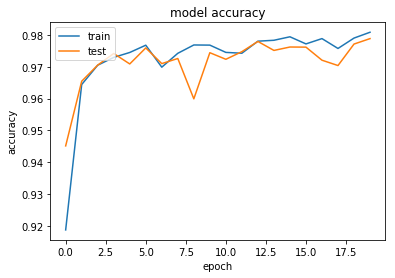

In [21]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

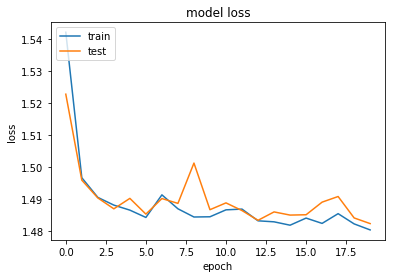

In [22]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
# Final evaluation of the model

scores = model.evaluate(x_test, y_test)

print("Accuracy : %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

28000/28000 [==============================] - 17s 607us/sample - loss: 1.4822 - accuracy: 0.9789
Accuracy : 97.89%
Baseline Error: 2.11%


In [24]:
import tensorflow as tf
y= model.predict(x_test)
print(y.shape)
y_pred = np.argmax(y, axis=1)
print(y_pred.shape)

#target=target_names = ['class0','class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9'] 

con = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
print(con)

(28000, 10)
(28000,)
tf.Tensor(
[[2665    1    0    0    6    2   15    1   15    7]
 [   0 3118    5    2    5    2    0    4    2    0]
 [   6   15 2765   28    6    0    0   13   22    5]
 [   1    4    6 2726    1   34    0   14   12   10]
 [   1    4    0    0 2739    0    4    4    6   14]
 [   2    1    2    5    0 2466   20    0   12    7]
 [   4    7    0    0   11    6 2730    0   10    0]
 [   1   13   20    3    6    1    0 2835    9   23]
 [   7   10    3    6    8   10    6    3 2613   14]
 [   5    6    0    3   43    7    1    7   13 2751]], shape=(10, 10), dtype=int32)


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2712
           1       0.98      0.99      0.99      3138
           2       0.99      0.97      0.98      2860
           3       0.98      0.97      0.98      2808
           4       0.97      0.99      0.98      2772
           5       0.98      0.98      0.98      2515
           6       0.98      0.99      0.98      2768
           7       0.98      0.97      0.98      2911
           8       0.96      0.97      0.97      2680
           9       0.97      0.97      0.97      2836

   micro avg       0.98      0.98      0.98     28000
   macro avg       0.98      0.98      0.98     28000
weighted avg       0.98      0.98      0.98     28000



# Visualization of activation map and convnet filters

In [ ]:
model.load_weights("Q3_part1_mnist_trained_model_adam.h5")
model.summary()

In [ ]:
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
print(model.inputs)

In [ ]:
img = x_test[10].reshape(1,28,28,1)
print(img.shape)
figure = plt.figure(figsize=(5,5))
plt.imshow (img[0,:,:,0],cmap="gray")
plt.axis('off')

In [ ]:
feature_maps = model.predict(img)

# plot all 64 maps in an 8x8 squares
square1 = 1
square2 = 1
ix = 1
for _ in range(square1):
	for _ in range(square2):
		# specify subplot and turn of axis
		ax = plt.subplot(square1, square2, ix)
		ax.set_xticks([])
		#ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-9], cmap='viridis')
		ix += 1
# show the figure
plt.savefig('featuremap_disp_filter.pngQ3_part1.png')

In [ ]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    #filters, biases = layer.get_weights()
    #print(layer.name, filters.shape)
    
filters, biases = model.layers[1].get_weights()
filters1 = filters
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min)/(f_max - f_min)
#print(filters.shape, biases.shape)
print(filters1.shape)
#plt.imshow(filters[1, :, :, 0], cmap='viridis')
#plt.show()
# plot all 64 maps in an 8x8 squares
n_filters = 1
ix = 1

for i in range(n_filters):
    f = filters[:, :, :, 30]
    #plot each channel seperately
    for j in range(1):
		# specify subplot and turn of axis
        ax = plt.subplot(n_filters, 1, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='viridis') 
        ix += 1
# show the figure
plt.savefig('featuremap_disp_filter.png')
plt.show()